In [116]:
import pandas as pd
import seaborn as sns
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
from scipy import stats

## Exploratory Data Analysis

In [117]:
Exp_and_Imp = pd.read_csv('import_and_export.csv')

In [149]:
Exp_and_Imp.head()

,Country,category,flow,measure,Unit,Year,Value
0,Ireland,Construction,Exports,US Dollars at current prices in millions,Millions of U.S. dollars,2012,69.379
1,Ireland,Construction,Exports,US Dollars at current prices in millions,Millions of U.S. dollars,2013,67.734
2,Ireland,Construction,Exports,US Dollars at current prices in millions,Millions of U.S. dollars,2014,79.710
3,Ireland,Construction,Exports,US Dollars at current prices in millions,Millions of U.S. dollars,2015,77.666
4,Ireland,Construction,Exports,US Dollars at current prices in millions,Millions of U.S. dollars,2016,76.376


In [119]:
Exp_and_Imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   location  60 non-null     object 
 1   category  60 non-null     object 
 2   flow      60 non-null     object 
 3   measure   60 non-null     object 
 4   Unit      60 non-null     object 
 5   Date      60 non-null     int64  
 6   Value     60 non-null     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 3.4+ KB


In [120]:
Exp_and_Imp.dtypes

location     object
category     object
flow         object
measure      object
Unit         object
Date          int64
Value       float64
dtype: object

In [121]:
# Renaming the column names 

Exp_and_Imp = Exp_and_Imp.rename(columns={"Date":"Year","location":"Country"})
Exp_and_Imp.head()


,Country,category,flow,measure,Unit,Year,Value
0,Ireland,Construction,Exports,US Dollars at current prices in millions,Millions of U.S. dollars,2012,69.379
1,Ireland,Construction,Exports,US Dollars at current prices in millions,Millions of U.S. dollars,2013,67.734
2,Ireland,Construction,Exports,US Dollars at current prices in millions,Millions of U.S. dollars,2014,79.710
3,Ireland,Construction,Exports,US Dollars at current prices in millions,Millions of U.S. dollars,2015,77.666
4,Ireland,Construction,Exports,US Dollars at current prices in millions,Millions of U.S. dollars,2016,76.376


In [122]:
Exp_and_Imp.shape 

(60, 7)

In [123]:
duplicate_rows_df= Exp_and_Imp[Exp_and_Imp.duplicated()] 
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 7)


In [124]:
print(Exp_and_Imp.isnull().sum()) 


Country     0
category    0
flow        0
measure     0
Unit        0
Year        0
Value       0
dtype: int64


## Descriptive Statistics

In [125]:
Exp_and_Imp.describe() # Why does it looks like this ??

,Year,Value
count,60.00000,60.000000
mean,2016.50000,2180.134800
std,2.89652,1461.661048
min,2012.00000,67.734000
25%,2014.00000,979.252250
50%,2016.50000,2315.629000
75%,2019.00000,3161.097500
max,2021.00000,5437.156000


In [126]:
# Summary of my categorical data 
Exp_and_Imp.describe(include=object) 

,Country,category,flow,measure,Unit
count,60,60,60,60,60
unique,3,1,2,1,1
top,Ireland,Construction,Exports,US Dollars at current prices in millions,Millions of U.S. dollars
freq,20,60,30,60,60


In [127]:
# mode of the categorical feature
mode = Exp_and_Imp['Country'].mode()
print(mode)

0            France
1           Ireland
2    United Kingdom
Name: Country, dtype: object


In [128]:
# mode of the categorical feature
median = Exp_and_Imp['Value'].median()
print(median)

2315.629


NameError: name 'std_dev' is not defined

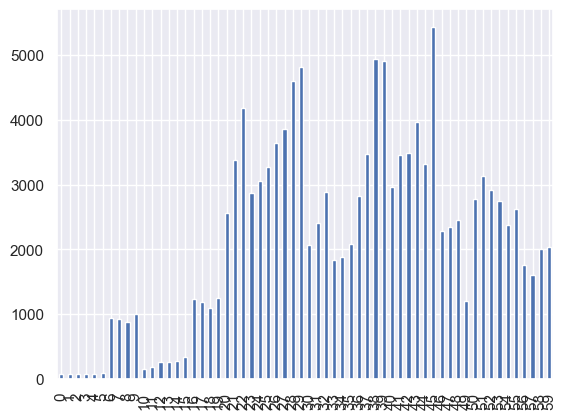

In [129]:
# Display of a histogram graph of the dispersion of a specific column 
Exp_and_Imp['Value'].plot(kind='bar')
plt.axvline(x=std_dev, color='r', linestyle='')

# set the plot title and labels
plt.title("Histogram with Standard Deviation")
plt.xlabel("Value")
plt.ylabel("Frecuency")

# display the plot
plt.show()

Text(0.5, 1.0, 'Box plot Value')

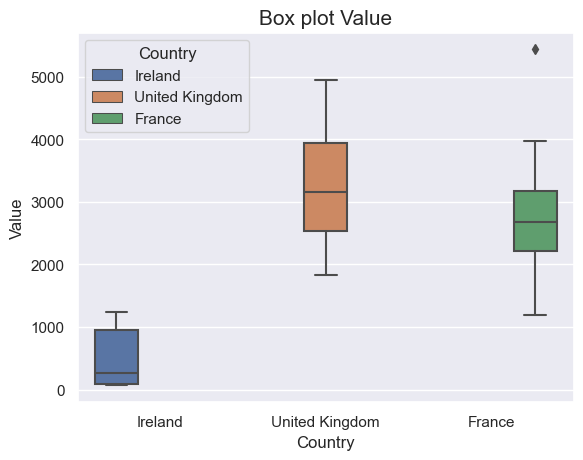

In [135]:
# Boxplot by Group
sns.boxplot(x = 'Country', y ='Value',
            data=Exp_and_Imp, hue = 'Country')
plt.title('Box plot Value',
          fontsize=15)

In [136]:
# Filter the data to only include imports and exports
data = Exp_and_Imp[Exp_and_Imp['flow'].isin(['Imports', 'Exports'])]

<AxesSubplot:ylabel='Year'>

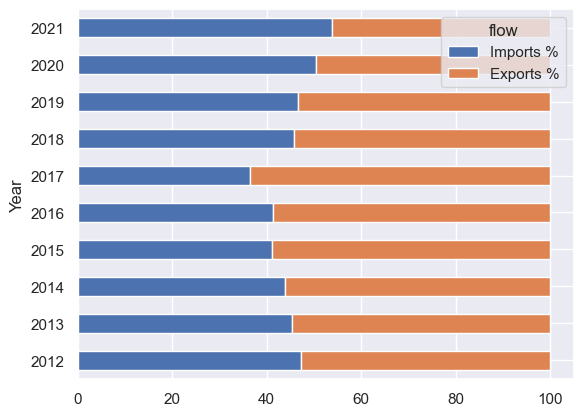

In [137]:
# Pivot the data to create a new DataFrame with years as columns and flows as rows
pivot_data = data.pivot_table(index='Year', columns= ['flow'], values='Value')
pivot_data['Total'] = pivot_data['Imports'] + pivot_data['Exports'] 
pivot_data['Imports %'] = pivot_data['Imports'] / pivot_data['Total'] * 100
pivot_data['Exports %'] = pivot_data['Exports'] / pivot_data['Total'] * 100

pivot_data = data.pivot_table(index='Year', columns='flow', values='Value')
pivot_data['Total'] = pivot_data['Imports'] + pivot_data['Exports']
pivot_data['Imports %'] = pivot_data['Imports'] / pivot_data['Total'] * 100
pivot_data['Exports %'] = pivot_data['Exports'] / pivot_data['Total'] * 100

# Create a horizontal stacked bar chart
pivot_data[['Imports %', 'Exports %']].plot(kind='barh', stacked=True)

## Normal distribution 

In [130]:
import pandas as pd
from scipy.stats import shapiro, norm
import matplotlib.pyplot as plt



In [131]:
values = Exp_and_Imp['Value']

# check if the data comes from a normal distribution using the Shapiro-Wilk test
stat, p = shapiro(values)
print('Shapiro-Wilk Test: Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('The data comes from a normal distribution')
else:
    print('The data does not come from a normal distribution')


Shapiro-Wilk Test: Statistics=0.956, p=0.029
The data does not come from a normal distribution


In [132]:
# generate a normal distribution with the same mean and standard deviation as the data
mu, std = norm.fit(values)
print('Mean: %.2f, Standard Deviation: %.2f' % (mu, std))

Mean: 2180.13, Standard Deviation: 1449.43


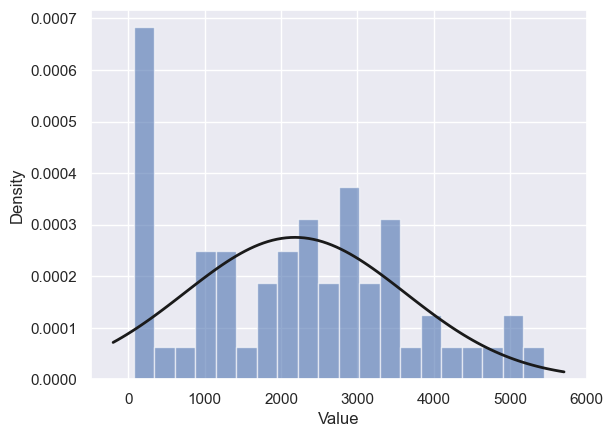

In [133]:
# plot the histogram of the data and the probability density function of the normal distribution
plt.hist(values, bins=20, density=True, alpha=0.6)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

## Non parametric 

In [138]:
from scipy.stats import wilcoxon
import pandas as pd

In [145]:

# Group the data by country
grouped_data = data.groupby("Country")

# Perform the Wilcoxon signed-rank test for each country
for country, group in grouped_data:
    # Extract the construction export values for each year
    values_2017 = group[group["Year"] == 2017]["Value"]
    values_2018 = group[group["Year"] == 2018]["Value"]
    values_2019 = group[group["Year"] == 2019]["Value"]
    values_2020 = group[group["Year"] == 2020]["Value"]
    values_2021 = group[group["Year"] == 2021]["Value"]
    
    # Perform the Wilcoxon signed-rank test for each pair of years
    _, p_value_2017_2018 = wilcoxon(values_2017, values_2018)
    _, p_value_2018_2019 = wilcoxon(values_2018, values_2019)
    _, p_value_2019_2020 = wilcoxon(values_2019, values_2020)
    _, p_value_2020_2021 = wilcoxon(values_2020, values_2021)
    
    # Print the p-values for each pair of years
    print(country)
    print("2017-2018: p =", p_value_2017_2018)
    print("2018-2019: p =", p_value_2018_2019)
    print("2019-2020: p =", p_value_2019_2020)
    print("2020-2021: p =", p_value_2020_2021)
    print("\n")


France
2017-2018: p = 0.5
2018-2019: p = 1.0
2019-2020: p = 0.5
2020-2021: p = 1.0


Ireland
2017-2018: p = 0.5
2018-2019: p = 0.5
2019-2020: p = 0.5
2020-2021: p = 0.5


United Kingdom
2017-2018: p = 0.5
2018-2019: p = 0.5
2019-2020: p = 0.5
2020-2021: p = 1.0




## Result of Wilcoxon

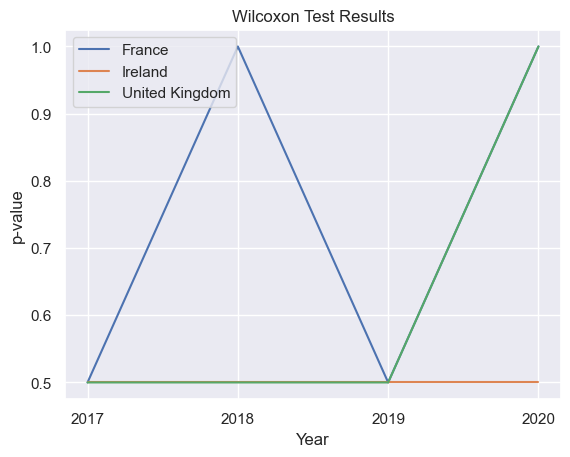

In [147]:
import matplotlib.pyplot as plt

# Define x-axis values (years)
years = [2017, 2018, 2019, 2020]

# Set the x-axis ticks to display as whole numbers
plt.xticks(years, [int(year) for year in years])

# Define y-axis values for each country
france = [0.5, 1.0, 0.5, 1.0]
ireland = [0.5, 0.5, 0.5, 0.5]
uk = [0.5, 0.5, 0.5, 1.0]

# Create the line graph
plt.plot(years, france, label='France')
plt.plot(years, ireland, label='Ireland')
plt.plot(years, uk, label='United Kingdom')

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('p-value')
plt.title('Wilcoxon Test Results')
plt.legend()

# Show the graph
plt.show()
